<a href="https://colab.research.google.com/github/Chiru2004/Emojimation/blob/ver1/EMOGIMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
import datetime
from keras import regularizers
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

In [4]:
# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!pip install -q kaggle
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!pwd
!ls
# Unzip data
!unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip train.csv

kaggle.json
/content/data
 97% 277M/285M [00:01<00:00, 201MB/s]
100% 285M/285M [00:01<00:00, 161MB/s]
/content/data
challenges-in-representation-learning-facial-expression-recognition-challenge.zip
Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: train.csv               


In [5]:
data = pd.read_csv('train.csv')
print(data.head(10))


   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8        3  85 84 90 121 101 102 133 153 153 169 177 189 1...
9        2  255 254 255 254 254 179 122 107 95 124 149 150...


In [6]:
import csv
import numpy

train_images = []
train_labels = []

categories_count = {}

with open('train.csv') as train:

    # Read train.csv file
    csv_reader = csv.reader(train)
    
    next(csv_reader)  # Skip the header

    for row in csv_reader:

        # Append image
        pixels_str = row[1]
        pixels_list = [int(i) for i in pixels_str.split(' ')]
        pixels_list = numpy.array(pixels_list, dtype='uint8')
        image = pixels_list.reshape((48, 48))
        train_images.append(image)

        

        # Calculate categories count
        label_str=row[0]
        count = 0
        if label_str in categories_count:
            count = categories_count[label_str] + 1
        categories_count[label_str] = count

        # Append label
        label = int(label_str)
        train_labels.append(label)

# Create numpy array of train images and labels
x_train = numpy.array(train_images)
y_train = numpy.array(train_labels)

print('x_train shape: {0}'.format(x_train.shape))
print('y_train shape: {0}'.format(y_train.shape))


x_train shape: (28709, 48, 48)
y_train shape: (28709,)


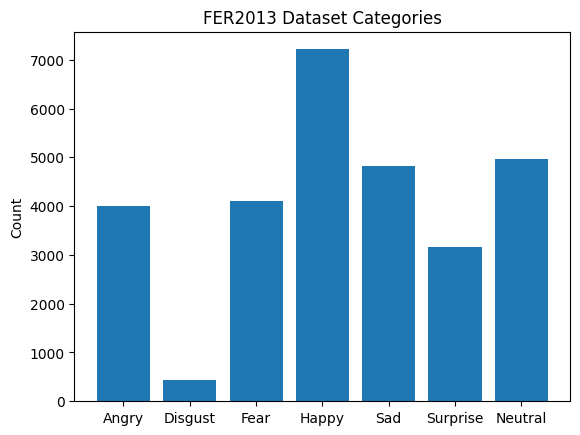

In [7]:

categories = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
y_pos = numpy.arange(len(categories))

counts = []
for label in range(len(categories)):
    label_str = str(label)                #type casting
    count = categories_count[label_str]
    counts.append(count)

# Draw histogram
plt.bar(y_pos, counts, align='center')
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('FER2013 Dataset Categories')

plt.show()

In [8]:
# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0  #normalisation
print(x_train.shape)
x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(22967, 48, 48)
(22967,)
(5742, 48, 48, 1)
(5742, 48, 48, 1)


# New Section

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential(name="Sq")
"""
model.add(Conv2D(128,(3,3),padding='valid',activation="relu",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#fully connected layer
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(7,activation="softmax"))
"""



model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1), name="Conv"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same',name="Conv_2"))
model.add(BatchNormalization(name="batch_2"))
model.add(MaxPooling2D((2,2) , strides=2 ,name="Pool_1"))
model.add(Dropout(0.3,name="dp1"))

#2nd layer
model.add(Conv2D(128,(3,3),activation='relu',padding='same',name="Conv2_3"))
model.add(BatchNormalization(name="batch3"))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',name="Conv2_4"))
model.add(BatchNormalization(name="batch4"))
model.add(MaxPooling2D((2,2),strides=(2,2),name="Pool2"))
model.add(Dropout(0.3,name="dp2"))

#3rd layer
model.add(Conv2D(256,(3,3),activation='relu',padding='same',name="Conv3_5"))
model.add(BatchNormalization(name="batch5"))
model.add(Conv2D(256,(3,3),activation='relu',padding='same',name="Conv3_6"))
model.add(BatchNormalization(name="batch6"))
model.add(Conv2D(256,(3,3),activation='relu',padding='same',name="Conv3_7"))
model.add(BatchNormalization(name="batch7"))
model.add(MaxPooling2D((2,2),strides=(2,2),name="Pool3"))
model.add(Dropout(0.3,name="dp3"))

#4th layer
model.add(Conv2D(512,(3,3),activation='relu',padding='same',name="Conv4_8"))
model.add(BatchNormalization(name="batch8"))
model.add(Conv2D(512,(3,3),activation='relu',padding='same',name="Conv4_9"))
model.add(BatchNormalization(name="batch9"))
model.add(Conv2D(512,(3,3),activation='relu',padding='same',name="Conv4_10"))
model.add(BatchNormalization(name="batch10"))
model.add(MaxPooling2D((2,2),strides=(2,2),name="Pool4"))
model.add(Dropout(0.3,name="dp4"))

#fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu',name='fc_1'))
model.add(Dense(128, activation='relu',name='fc_2'))
model.add(Dropout(0.2, name="dp6"))
model.add(Dense(7,activation='softmax',name="output"))


In [11]:
model.summary()

Model: "Sq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv (Conv2D)               (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 Conv_2 (Conv2D)             (None, 48, 48, 64)        36928     
                                                                 
 batch_2 (BatchNormalization  (None, 48, 48, 64)       256       
 )                                                               
                                                                 
 Pool_1 (MaxPooling2D)       (None, 24, 24, 64)        0         
                                                                 
 dp1 (Dropout)               (None, 24, 24, 64)        0        

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
history=model.fit(x=x_train,y=y_train,epochs=25,verbose=1,validation_split=0.17)

Epoch 1/25
596/596 [==============================] - 46s 44ms/step - loss: 1.9303 - accuracy: 0.2396 - val_loss: 1.8266 - val_accuracy: 0.2843
Epoch 2/25
596/596 [==============================] - 26s 43ms/step - loss: 1.6147 - accuracy: 0.3640 - val_loss: 1.5405 - val_accuracy: 0.4023
Epoch 3/25
596/596 [==============================] - 26s 43ms/step - loss: 1.4128 - accuracy: 0.4540 - val_loss: 1.4118 - val_accuracy: 0.4438
Epoch 4/25
596/596 [==============================] - 25s 43ms/step - loss: 1.3043 - accuracy: 0.5036 - val_loss: 1.3340 - val_accuracy: 0.4948
Epoch 5/25
596/596 [==============================] - 26s 43ms/step - loss: 1.2365 - accuracy: 0.5271 - val_loss: 1.3280 - val_accuracy: 0.5147
Epoch 6/25
596/596 [==============================] - 25s 43ms/step - loss: 1.1982 - accuracy: 0.5462 - val_loss: 1.3100 - val_accuracy: 0.5029
Epoch 7/25
596/596 [==============================] - 26s 43ms/step - loss: 1.1585 - accuracy: 0.5636 - val_loss: 1.2360 - val_accuracy:

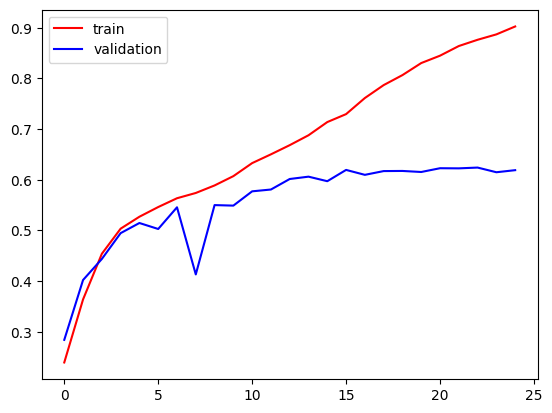

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
prediction=model.predict(x=x_test,batch_size=0,verbose=1)

180/180 [==============================] - 2s 11ms/step


In [18]:
for i in range(10):
  print(prediction[i])

[1.7839440e-05 4.8695044e-09 1.0085395e-02 1.4030040e-06 9.8985744e-01
 5.1216165e-09 3.7943893e-05]
[6.2140776e-04 1.0831224e-08 1.7174504e-04 9.9914861e-01 1.8562301e-05
 2.4463552e-05 1.5183637e-05]
[5.5732762e-06 5.9813449e-10 1.8648732e-05 9.9782985e-01 7.5883014e-07
 2.1257428e-03 1.9323936e-05]
[9.1447890e-02 7.7931111e-04 3.9195505e-01 3.8833654e-04 4.7849721e-01
 1.0720021e-03 3.5860244e-02]
[3.1339912e-06 4.1506465e-09 2.2702355e-02 7.3767808e-07 9.7728914e-01
 5.1334061e-09 4.6419186e-06]
[1.33219231e-08 1.08721205e-16 1.33761224e-09 9.99907494e-01
 2.17695710e-08 9.83162440e-10 9.24329361e-05]
[0.05336556 0.00168701 0.23406021 0.01691972 0.10394802 0.07248871
 0.5175308 ]
[5.1409632e-05 8.4263296e-10 1.8510575e-05 9.9979562e-01 7.6644510e-06
 5.1397132e-05 7.5534335e-05]
[2.0170780e-03 9.8996388e-05 1.5209238e-02 8.5931426e-01 1.3871406e-03
 1.2012814e-01 1.8451631e-03]
[0.27011257 0.00273817 0.05335471 0.00604077 0.10391424 0.01896601
 0.54487354]


In [19]:
rounded_prediction=np.argmax(prediction,axis=1)

In [20]:
model.evaluate(x=x_test,y=y_test,verbose=1)

180/180 [==============================] - 2s 11ms/step - loss: 1.6186 - accuracy: 0.6137


[1.6185637712478638, 0.6137234568595886]

In [21]:
count1=0;
count2=0;
for i in range(len(y_test)):
  if(y_test[i]==rounded_prediction[i]):
    count1=count1+1
  else:
    count2=count2+1
print("Total predictions=> ",count1+count2,"\nTotal correct predictions=> ",count1,"\nTotal wrong predictions=> ",count2)
per=(count1/(count1+count2))*100
print("percentage success=> ",per,"\nPercentage failure",100-per)


Total predictions=>  5742 
Total correct predictions=>  3524 
Total wrong predictions=>  2218
percentage success=>  61.37234413096482 
Percentage failure 38.62765586903518
